## Real estate price predictor

the objective of this project is to predict the price of a house on the basis of the given factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('datasets/Real_estate_prediction.csv')

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### **Data Cleaning**

#### changing column headings

In [4]:
new_headings=['No.','date','age','dist_mrt','num_stores','latitude','longitude','price']
data=data.set_axis(new_headings,axis=1)

In [5]:
data.set_index('No.',inplace=True)

#### changing data type

In [6]:
data['date']=data['date'].astype(int)

#### checking for duplicates

In [7]:
duplicates=data.duplicated()
duplicates.any()

False

#### checking for null values

In [8]:
data.isnull().sum()

date          0
age           0
dist_mrt      0
num_stores    0
latitude      0
longitude     0
price         0
dtype: int64

#### dealing with outliers

setting graph attributes

In [9]:
sns.set(style="whitegrid", palette="deep", rc={"figure.figsize": (6, 4)})

* age

Text(0.5, 1.0, 'Box Plot of Age')

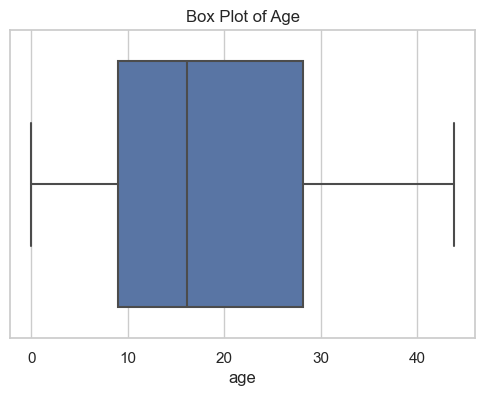

In [10]:
sns.boxplot(x=data['age'])
plt.title('Box Plot of Age')

* distance to metro station

<Axes: xlabel='dist_mrt'>

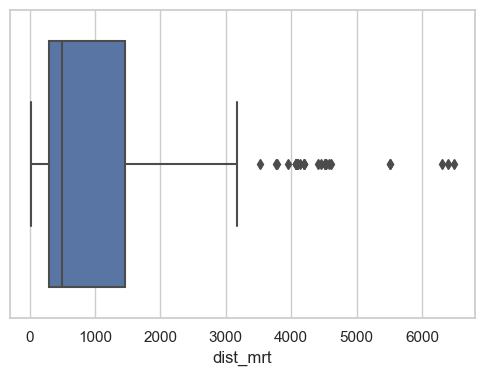

In [11]:
sns.boxplot(x=data['dist_mrt'])

* num_stores

<Axes: xlabel='num_stores'>

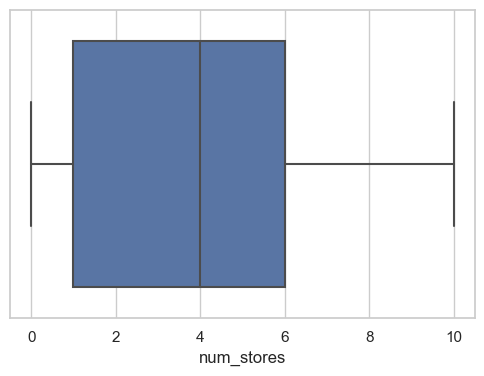

In [12]:
sns.boxplot(x=data['num_stores'])

* latitude and longitude

<Axes: xlabel='latitude'>

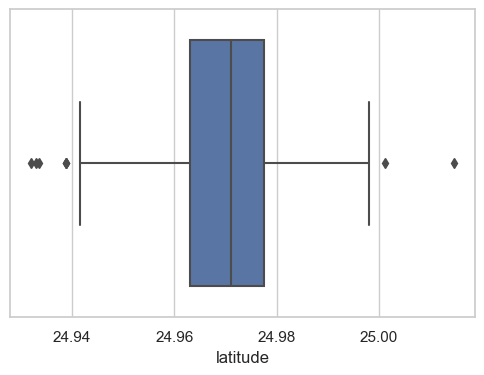

In [13]:
sns.boxplot(x=data['latitude'])

<Axes: xlabel='longitude'>

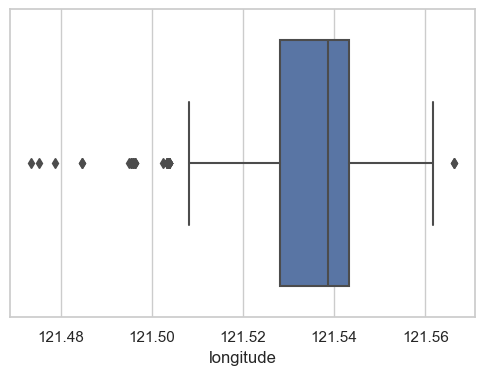

In [14]:
sns.boxplot(x=data['longitude'])

* house price

<Axes: xlabel='price'>

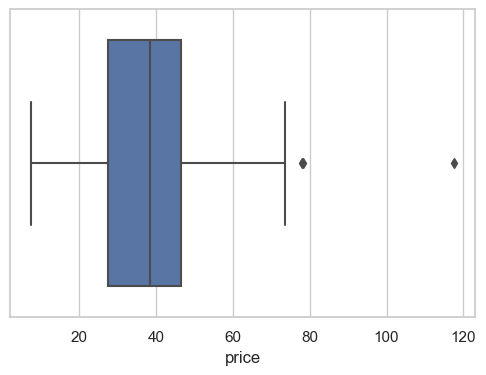

In [15]:
sns.boxplot(x=data['price'])

##### there are ouliers in: 
* dist_mrt
* latitude and longitude
* price


#### removing outliers

In [16]:
data = data[data['price']<80]
data = data[data['dist_mrt']<3000]
data = data[(data['longitude']>121.50) & (data['longitude']<121.56)]
data=data[(data['latitude'] >24.92) & (data['latitude'] < 25.00)]


#### exploring data

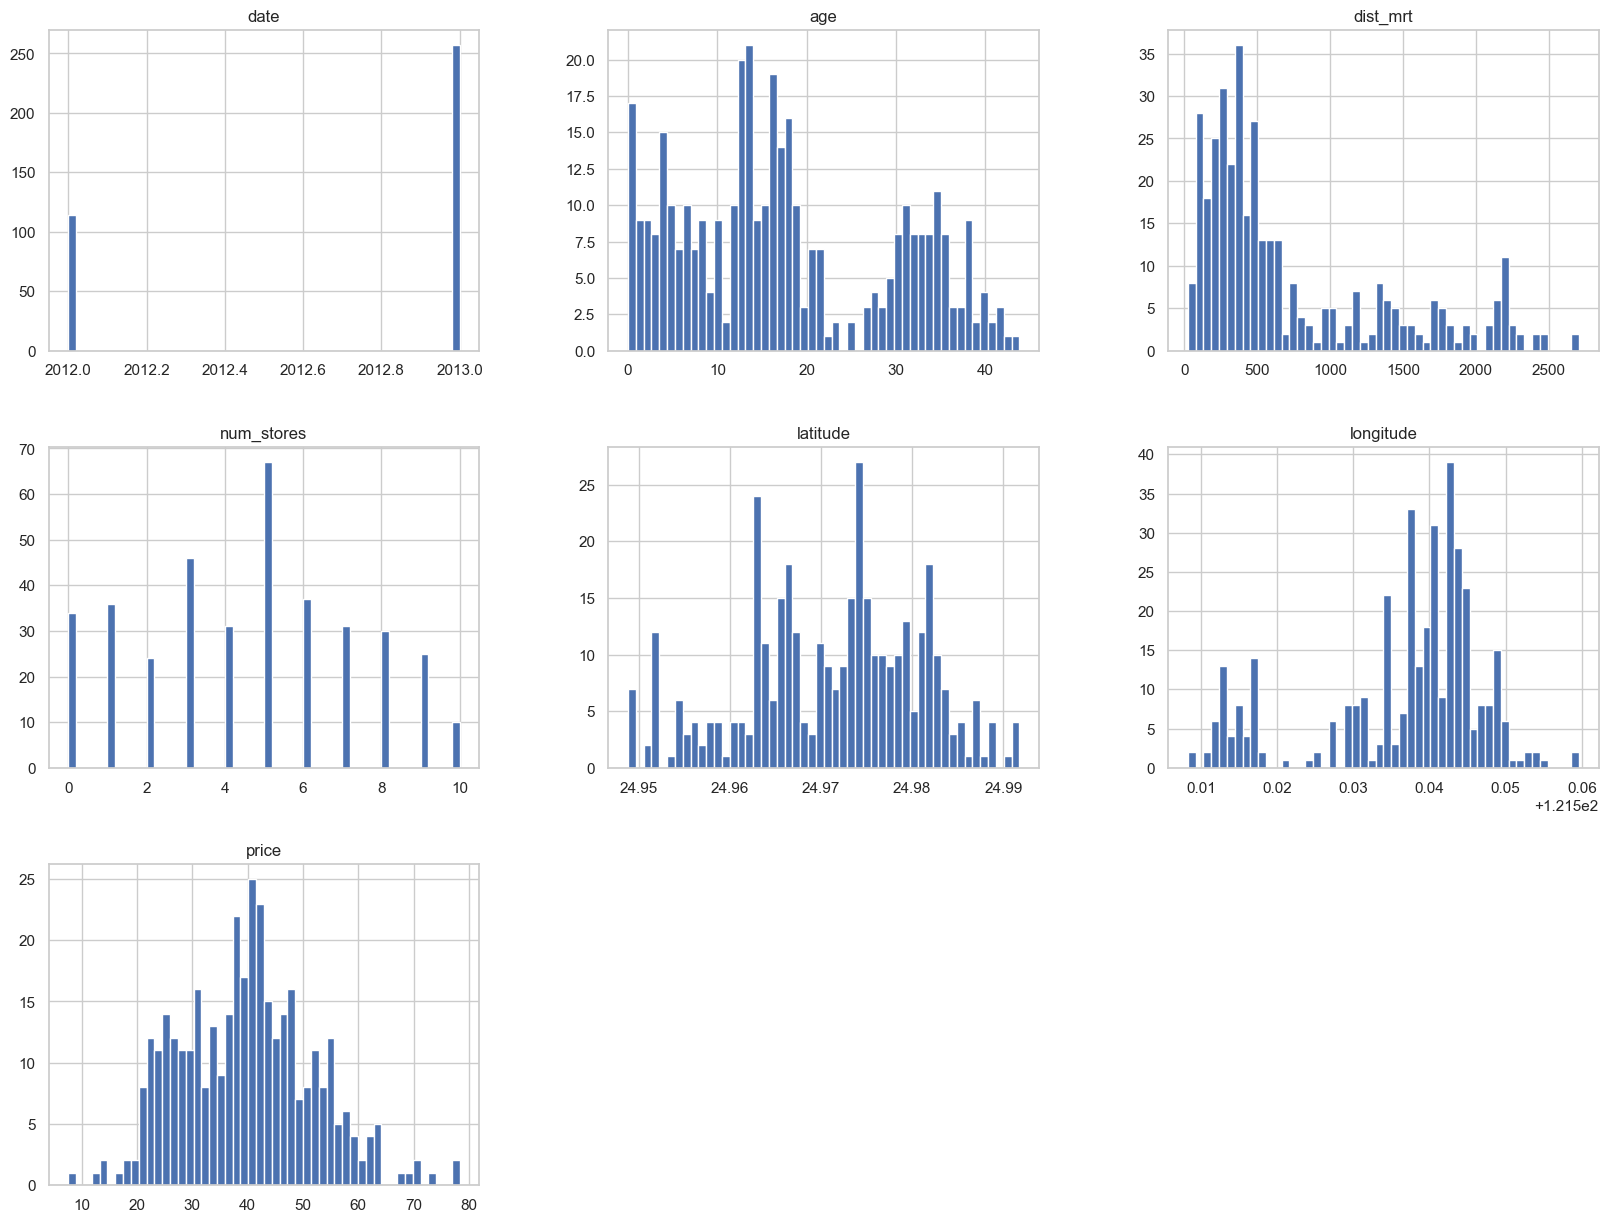

In [17]:
data.hist(bins=50, figsize=(20,15))
plt.show()

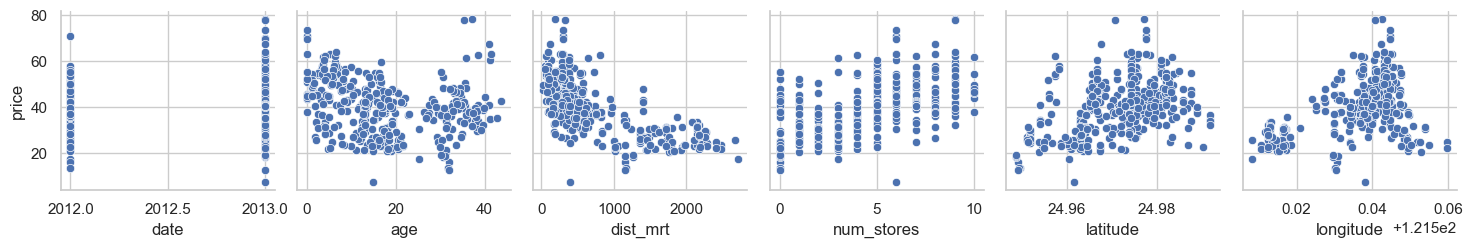

In [18]:
sns.pairplot(data,x_vars=['date', 'age', 'dist_mrt', 'num_stores','latitude', 'longitude'], y_vars= 'price')

#### checking correlation

<Axes: >

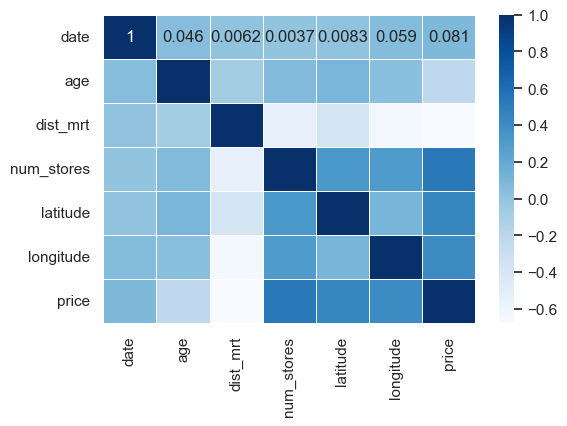

In [19]:

plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(),cmap='Blues',linewidths=0.5,annot=True)

### Splitting Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

* x1 - the predictor variables
* y1 - target variable (what we have to predict)

In [21]:
x1 = data.drop( ['price'], axis=1) 
y1 = data.price  

* The dataset is split into training (80%) and testing (20%) sets.
* random_state=100 ensures the split is reproducible.

In [22]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.2,random_state = 100)

### Linear Regression Model

#### fitting the model

In [23]:
reg = LinearRegression()
reg.fit (x1_train, y1_train)
np.set_printoptions(suppress=True) #to remove scientifc notation e
reg.coef_

array([  2.99152596,  -0.26835122,  -0.00966445,   0.94885872,
       244.84280554,   6.19088845])

the coeffecients in the array show that by increase in one unit of the predictor varibale the target variable changes by that amount

#### evaluating model

In [24]:
y1_pred = reg.predict(x1_test)
print('r2 Score : ', r2_score(y1_test, y1_pred))

r2 Score :  0.5982521599248334


* An R² score of 0.598 suggests that the model has a moderate to strong fit to the data.
* 59.825% of the variance in the target variable can be explained by the features in the model.



#### visualising errors

In [25]:
df=pd.DataFrame({'actual':y1_test,'predictions':y1_pred})
df['predictions']=round(df['predictions'])
df.head()

,actual,predictions
No.,,
325,31.3,25.0
274,29.3,44.0
337,35.6,31.0
169,37.4,39.0
306,55.0,48.0


black line represents equal values

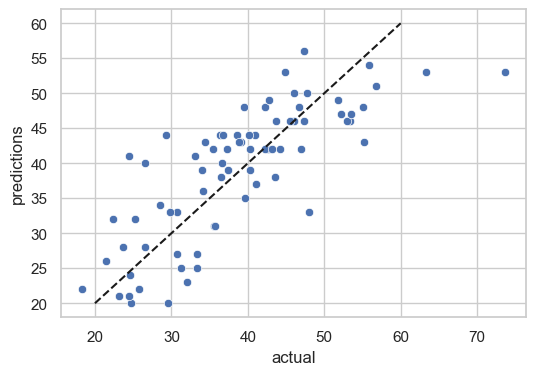

In [39]:
sns.scatterplot(x='actual',y='predictions',data=df)
plt.plot( [20,40,60], [20,40,60], linestyle='--', color='k' )

### creating function to predict diffrent entries

In [27]:
def predict_price(input_data):
    predicted_price= reg.predict(input_data)
    return predicted_price

In [28]:
a=np.array([[2012,32,84.8,10,24.982,121.540]])
predict_price(a)

array([47.91466456])

### Ridge and Lasso Regression

* Ridge Regression: It smooths out our predictions by putting a limit on how much the factors can influence the outcome. 
* Lasso Regression: It helps us pick out the most important factors for prediction and ignores the less important ones.

In [29]:
from sklearn.linear_model import Ridge, Lasso

In [30]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit (x1_train, y1_train)
y1_pred_ridge = ridge_reg.predict(x1_test)
print('r^2 Score : ', r2_score(y1_test, y1_pred_ridge))

r^2 Score :  0.5137553917221791


In [31]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit (x1_train, y1_train)
y1_pred_lasso = lasso_reg.predict(x1_test)
print('r^2 Score : ', r2_score(y1_test, y1_pred_lasso))

r^2 Score :  0.5165128015246209
